In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
import numpy as np
import matplotlib.pyplot as plt

con = sqlite3.connect("database.sqlite")
df = pd.read_sql_query("""SELECT 
funded_amnt ,
funded_amnt_inv,
loan_amnt ,
cast (replace( term, ' months', '' ) as FLOAT) as term_float,
cast (replace( int_rate, '%', '' ) as FLOAT) as int_rate_float,
installment ,
annual_inc ,
dti ,
delinq_2yrs ,
inq_last_6mths ,
open_acc ,
pub_rec ,
revol_bal ,
total_acc ,
out_prncp ,
out_prncp_inv,
total_pymnt ,
total_pymnt_inv,
total_rec_prncp ,
total_rec_int ,
total_rec_late_fee ,
recoveries ,
collection_recovery_fee ,
last_pymnt_amnt from loan WHERE
funded_amnt IS NOT NULL AND
loan_amnt IS NOT NULL AND
term_float IS NOT NULL AND
int_rate_float IS NOT NULL AND
installment IS NOT NULL AND
emp_length IS NOT NULL AND
annual_inc IS NOT NULL AND
dti IS NOT NULL AND
delinq_2yrs IS NOT NULL AND
inq_last_6mths IS NOT NULL AND
open_acc IS NOT NULL AND
pub_rec IS NOT NULL AND
revol_bal IS NOT NULL AND
total_acc IS NOT NULL AND
out_prncp IS NOT NULL AND
total_pymnt IS NOT NULL AND
total_rec_prncp IS NOT NULL AND
total_rec_int IS NOT NULL AND
total_rec_late_fee IS NOT NULL AND
recoveries IS NOT NULL AND
collection_recovery_fee IS NOT NULL AND
last_pymnt_amnt IS NOT NULL limit 8000
""", con)




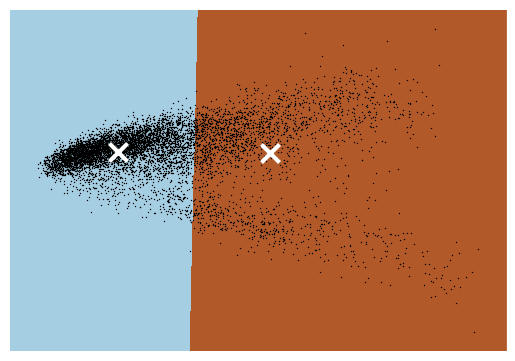

In [49]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

np.random.seed(42)

data = scale(df)

reduced_data = PCA(n_components=2).fit_transform(data)

#reduced_data = preprocessing.normalize(reduced_data)

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.64287616784810031)


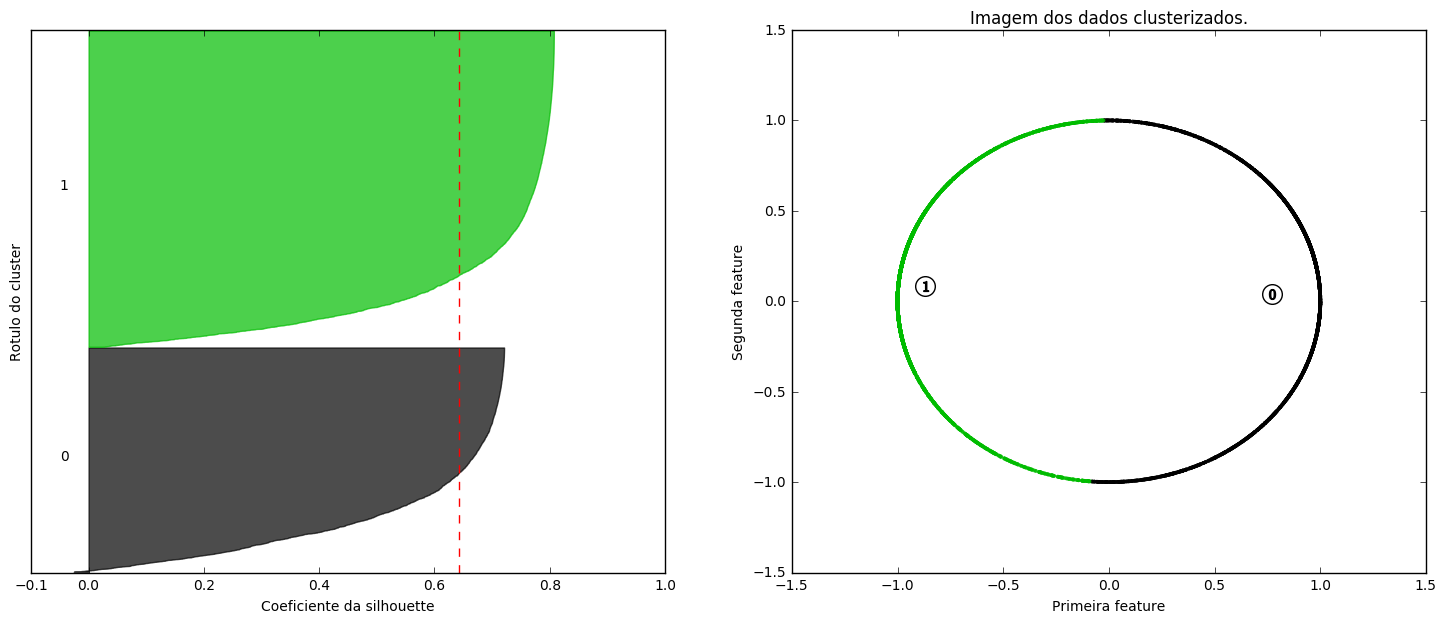

('For n_clusters =', 3, 'The average silhouette_score is :', 0.61884434893067419)


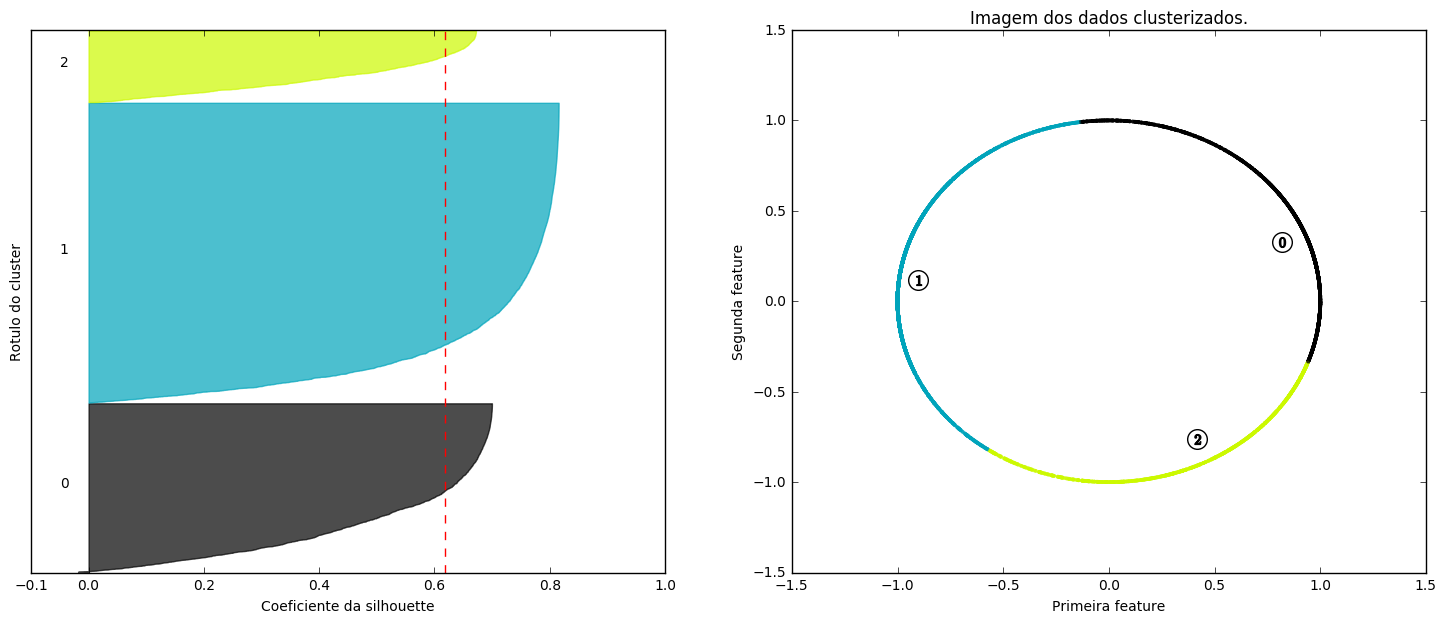

('For n_clusters =', 4, 'The average silhouette_score is :', 0.60998670485647355)


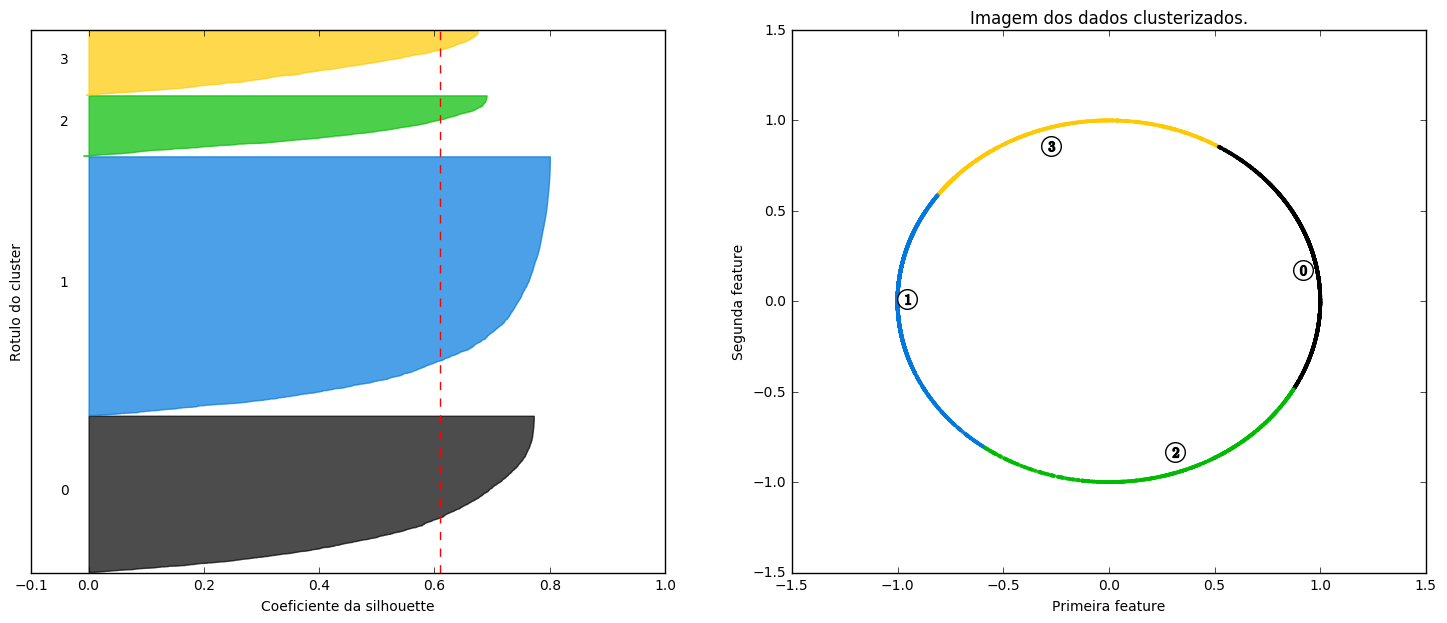

('For n_clusters =', 5, 'The average silhouette_score is :', 0.57605432016694513)


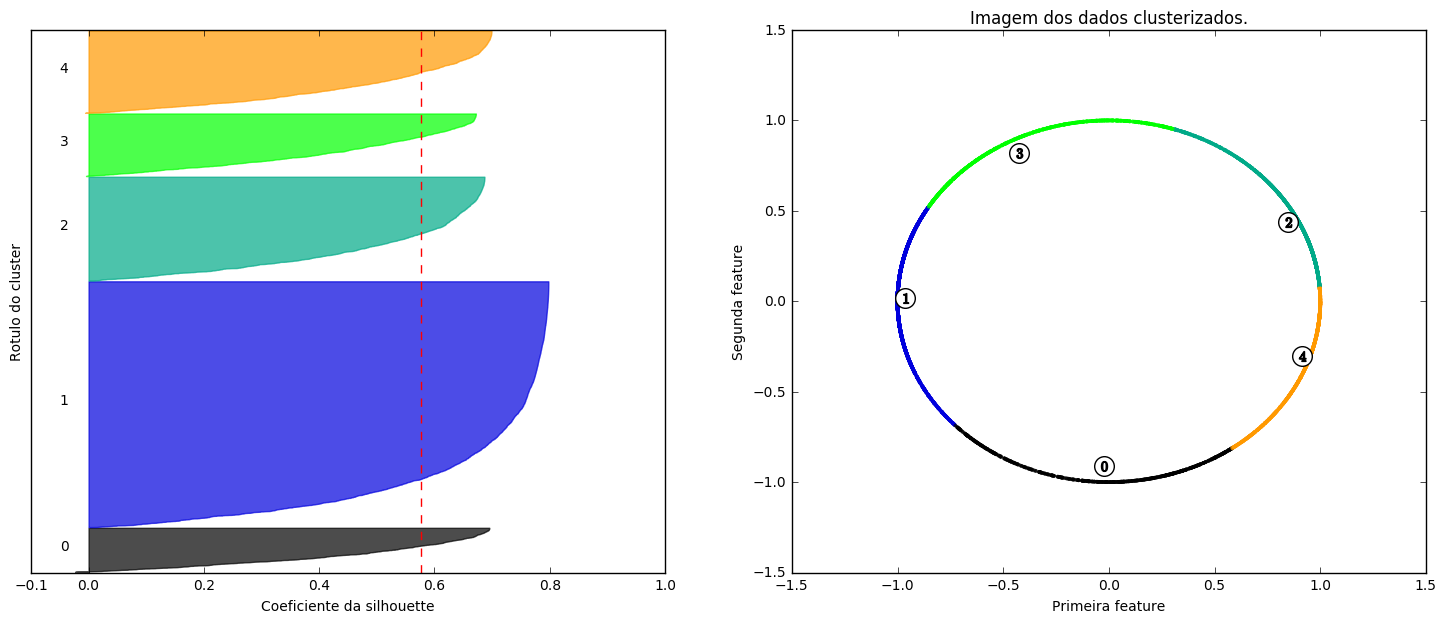

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


reduced_data = preprocessing.normalize(reduced_data)

X = reduced_data

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Coeficiente da silhouette")
    ax1.set_ylabel("Rotulo do cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Imagem dos dados clusterizados.")
    ax2.set_xlabel("Primeira feature")
    ax2.set_ylabel("Segunda feature")


    plt.savefig('silhoute'+str(n_clusters)+'.png', bbox_inches='tight')
    plt.show()

## from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = df, kmeans.labels_

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.savefig('tree-most-important-features.png', bbox_inches='tight')

plt.show()

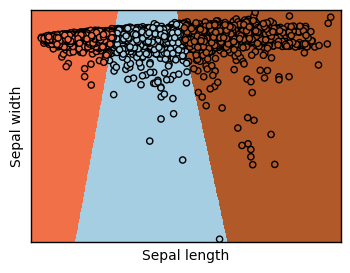

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with

X = reduced_data
Y = kmeans.labels_

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with

X = reduced_data
y = kmeans.labels_
class_names = ['1', '2', '3']


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
y_pred = logreg.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confusionMatrixRegLog.png', bbox_inches='tight')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'linear_model' is not defined

In [51]:
from sklearn import tree
import pydotplus

y = kmeans.labels_

clf = tree.DecisionTreeClassifier()
clf = clf.fit(reduced_data, y)

feature_names = [
"funded_amnt" ,
"loan_amnt" ,
"term_float",
"int_rate_float",
"installment" ,
"annual_inc" ,
"dti" ,
"delinq_2yrs" ,
"inq_last_6mths" ,
"open_acc" ,
"pub_rec" ,
"revol_bal" ,
"total_acc" ,
"out_prncp" ,
"total_pymnt" ,
"total_rec_prncp" ,
"total_rec_int" ,
"total_rec_late_fee" ,
"recoveries" ,
"collection_recovery_fee" ,
"last_pymnt_amnt" ,
"collections_12_mths_ex_med" ,
"acc_now_delinq"
]
target_names = ["1", "2", "3"]

from StringIO import StringIO
out = StringIO()

from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("loan.png")

True

Confusion matrix, without normalization
[[649  55  13]
 [ 46 966   0]
 [ 51   0 220]]
Normalized confusion matrix
[[ 0.91  0.08  0.02]
 [ 0.05  0.95  0.  ]
 [ 0.19  0.    0.81]]


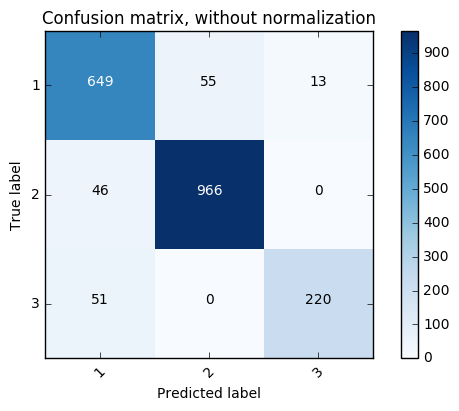

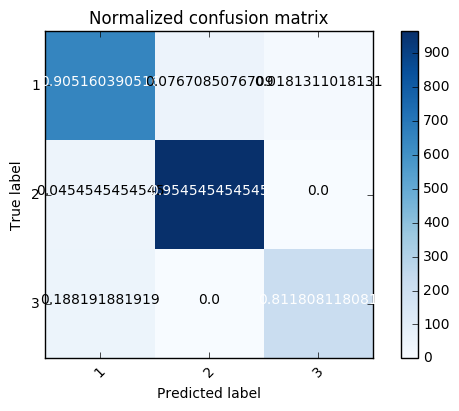

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# import some data to play with

X = df
y = kmeans.labels_
class_names = ['1', '2', '3']


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


random = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

# we create an instance of Neighbours Classifier and fit the data.
#trained = random.fit(X_train, y_train)
y_pred = random.fit(X_train, y_train).predict(X_test)

#print "Score random: {0}" % random.score()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confusionMatrixRanFor.png', bbox_inches='tight')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

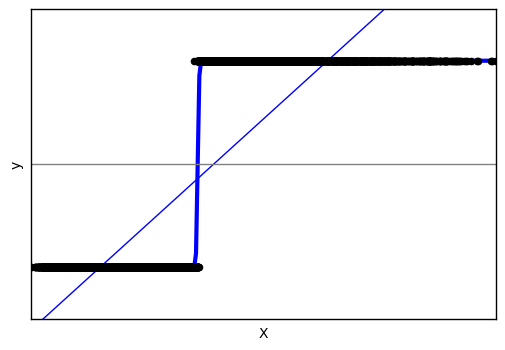

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X = X[:, 0]


X = X[:, np.newaxis]


y = kmeans.labels_



# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)



def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(())
plt.yticks(())
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)


plt.savefig('logit.png', bbox_inches='tight')

plt.show()



In [28]:
clf.intercept_

array([ -0.7 , -18.43, -41.1 ])

In [2]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30
df.corr().to_csv(path_or_buf="correlation.csv", float_format="%.3f")

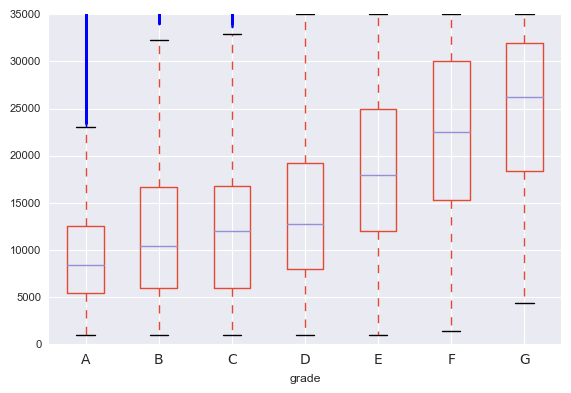

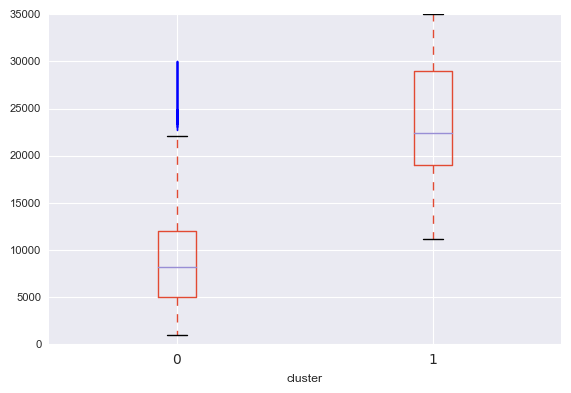

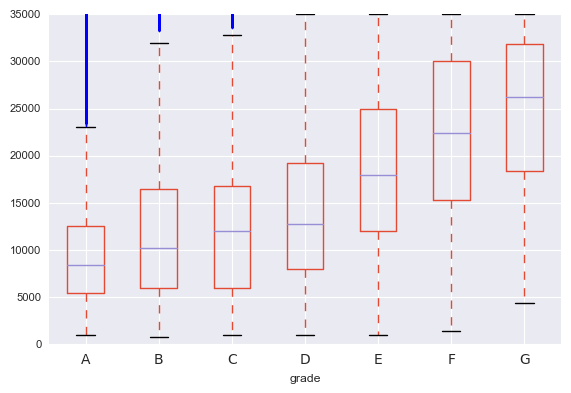

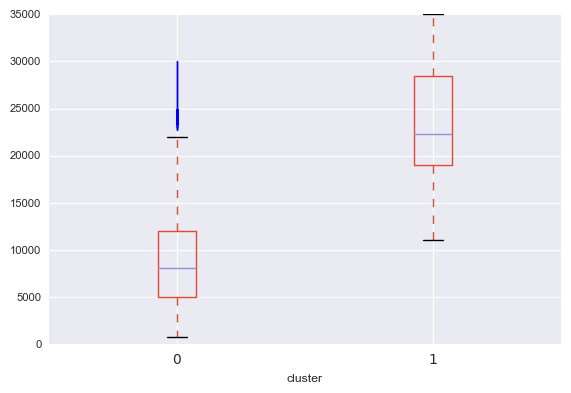

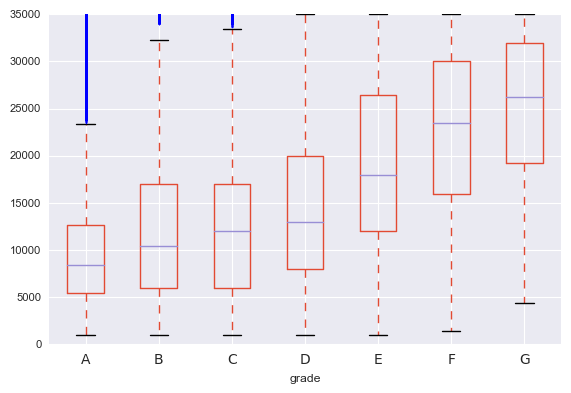

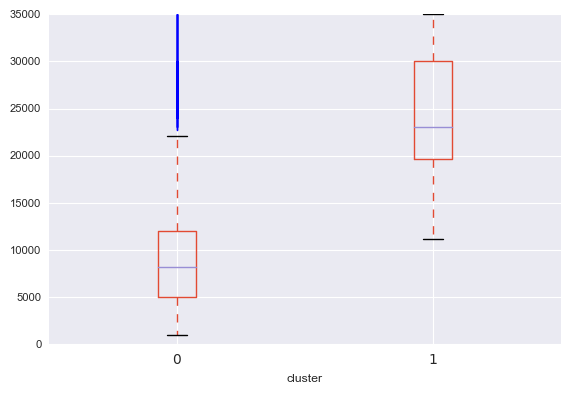

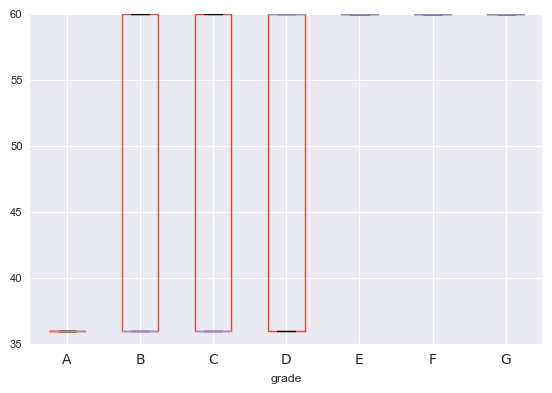

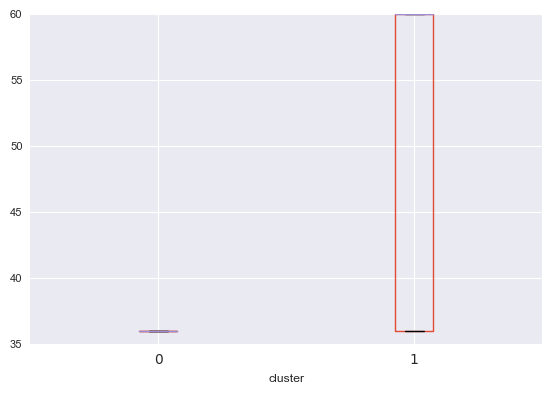

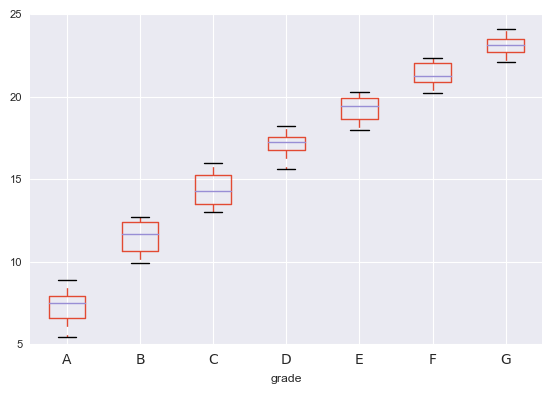

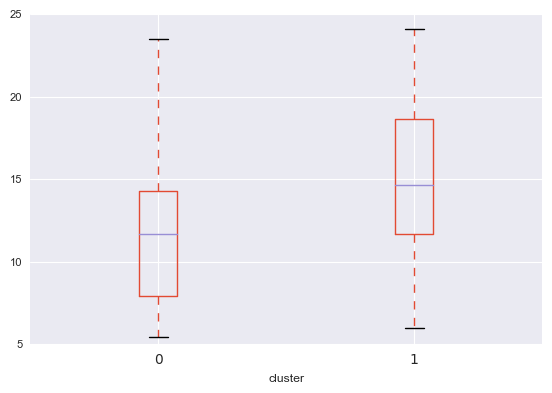

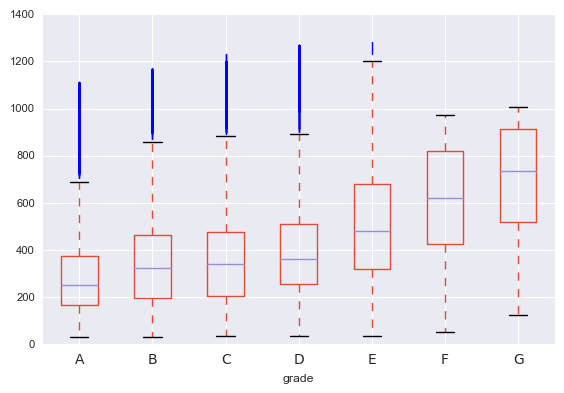

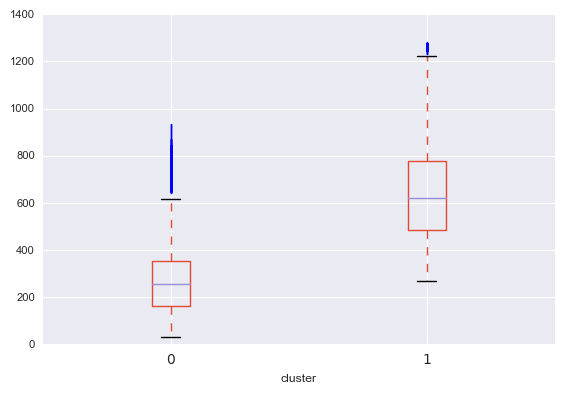

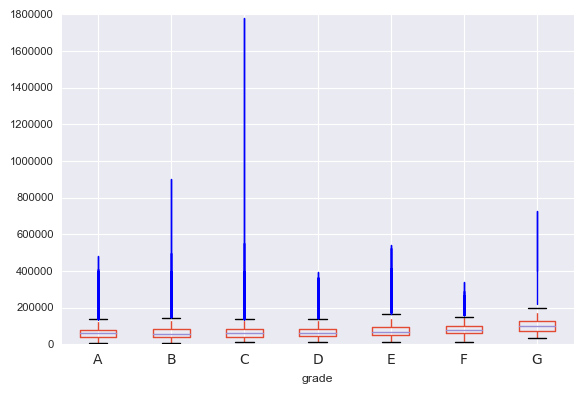

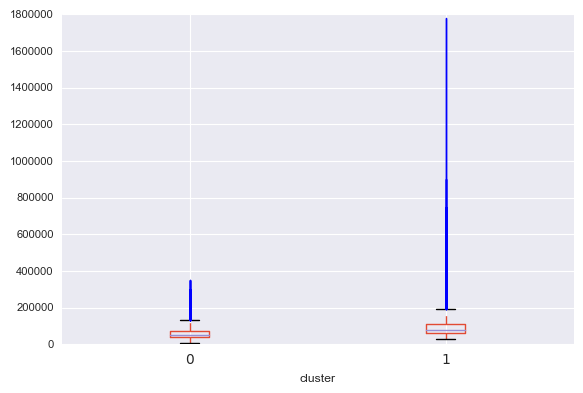

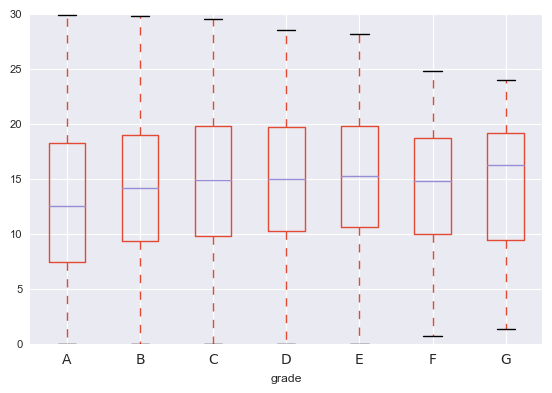

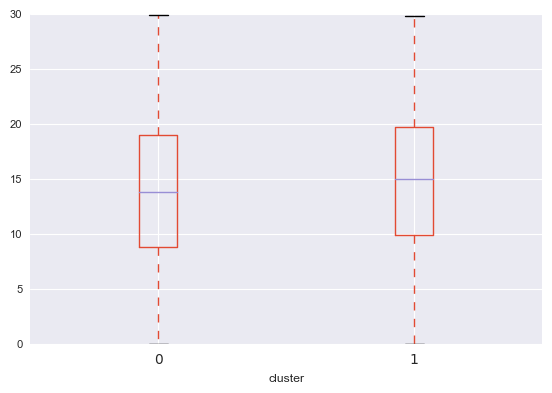

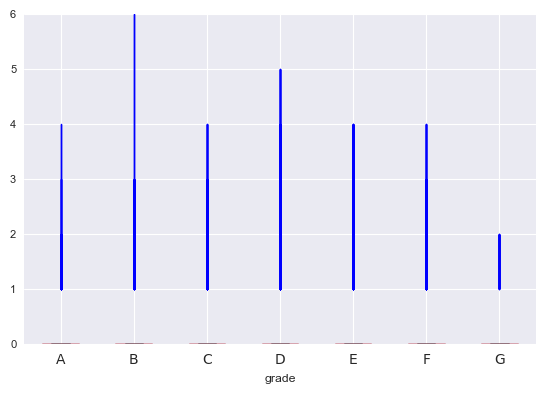

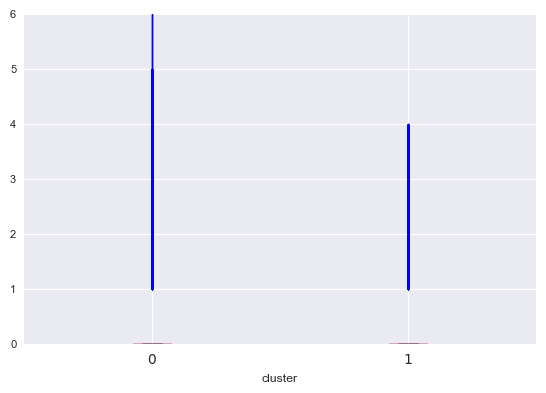

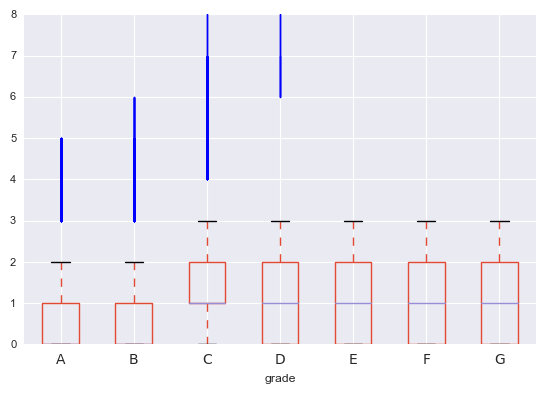

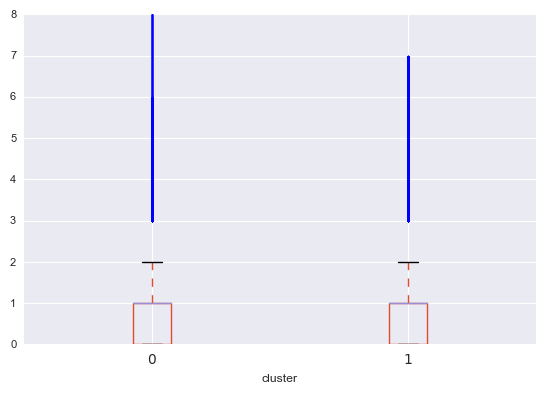

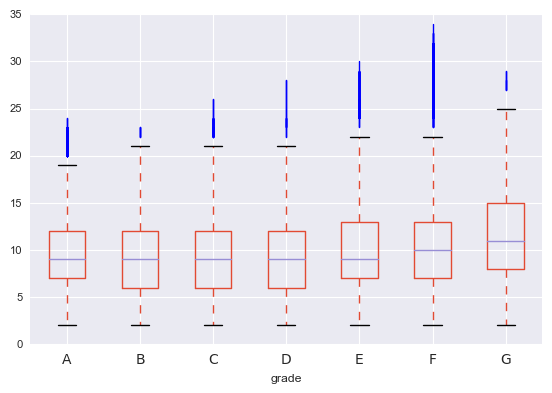

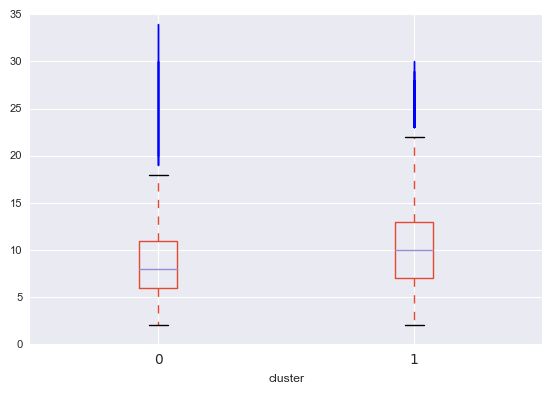

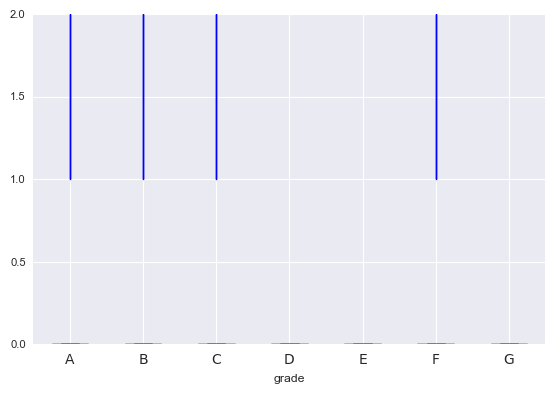

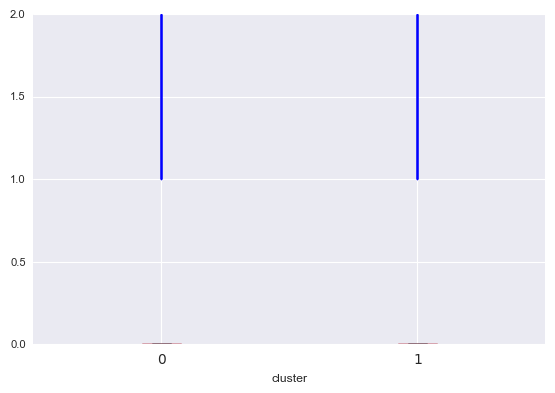

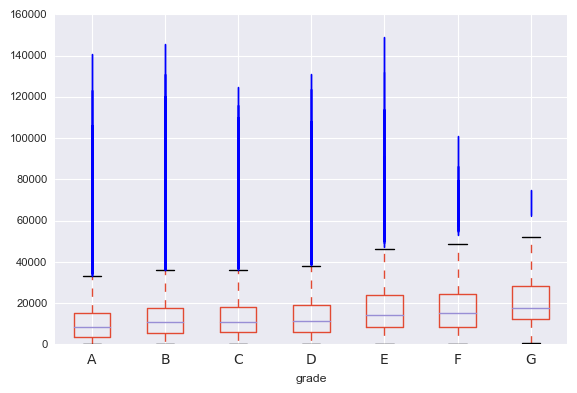

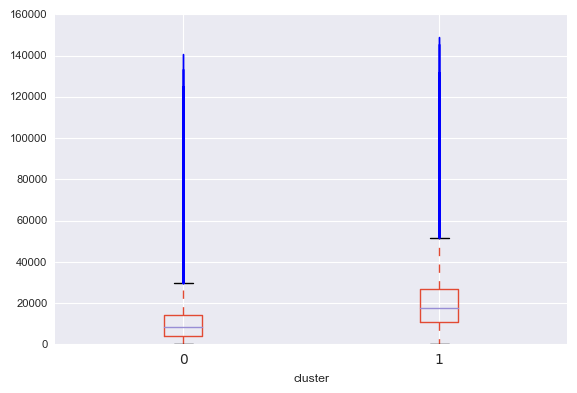

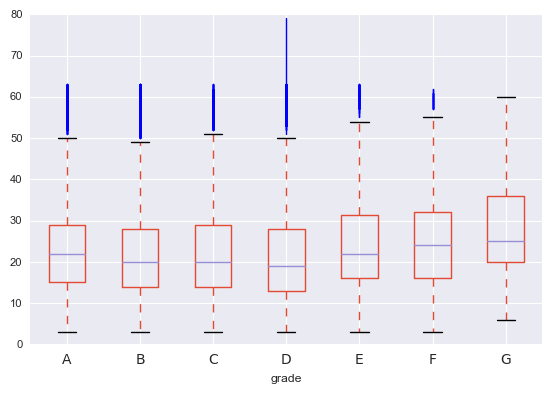

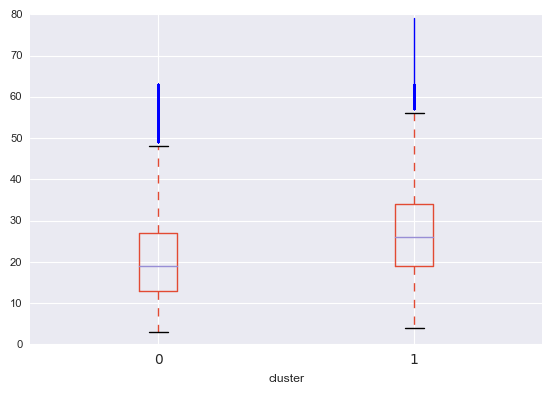

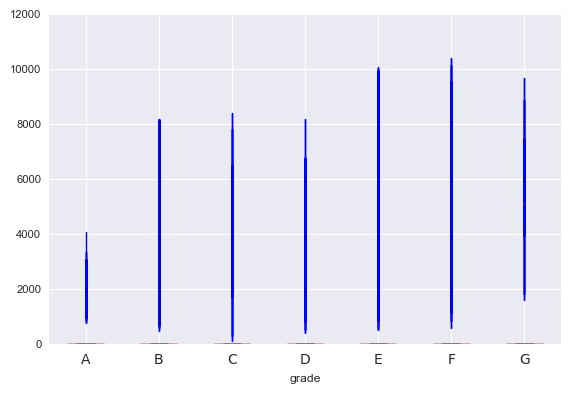

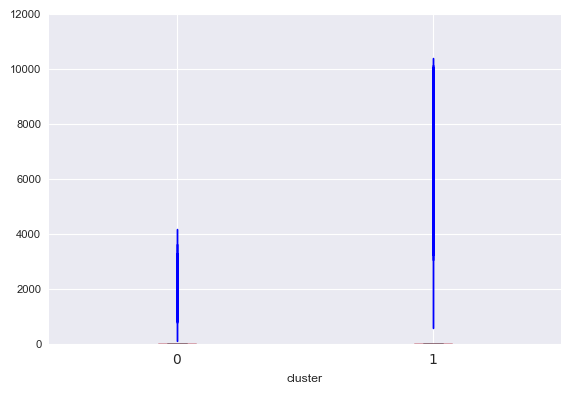

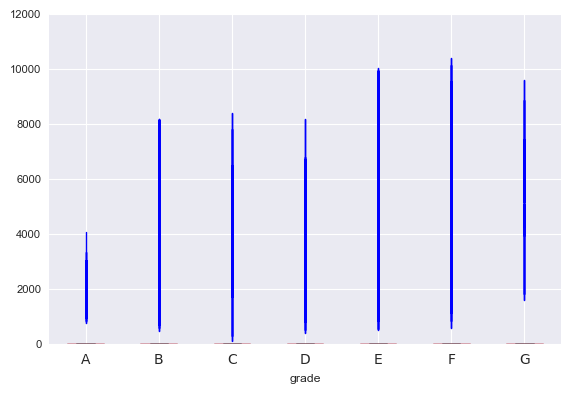

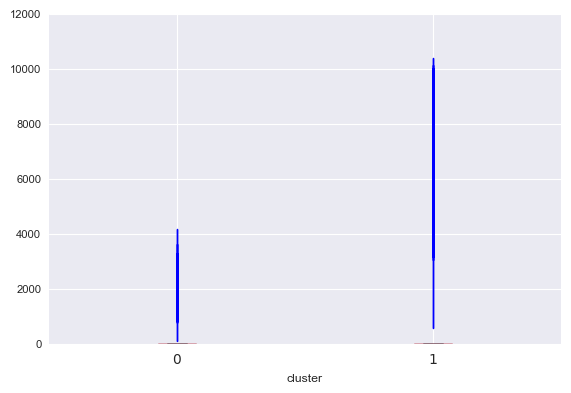

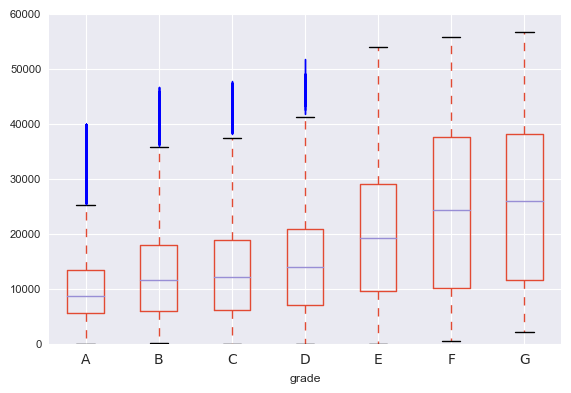

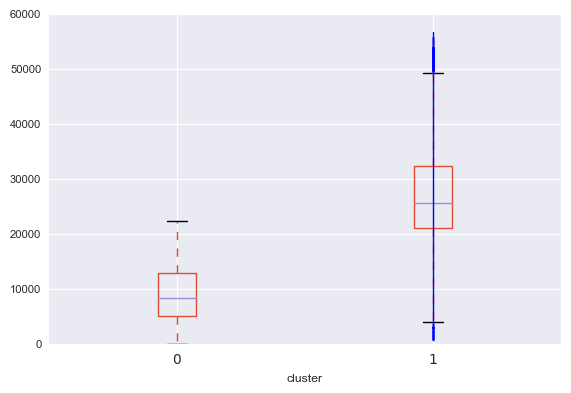

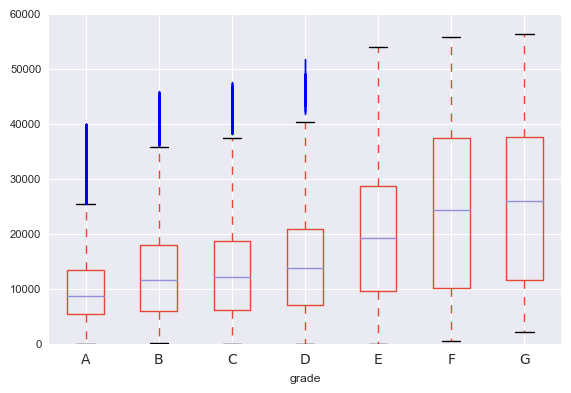

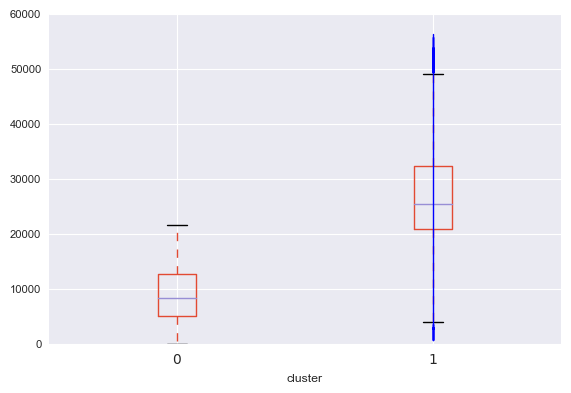

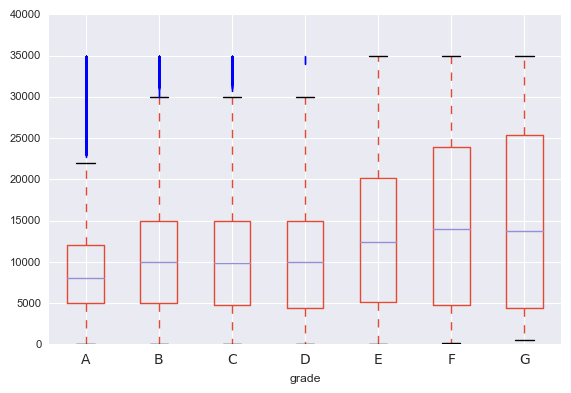

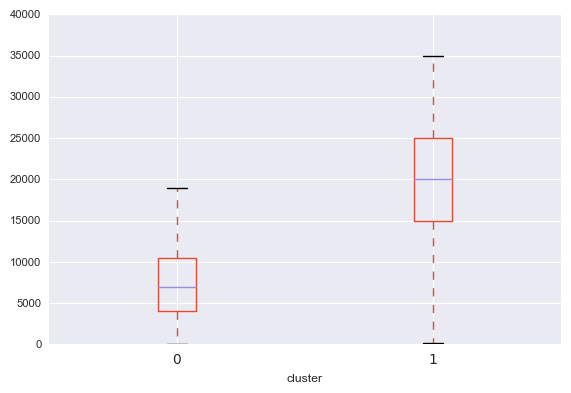

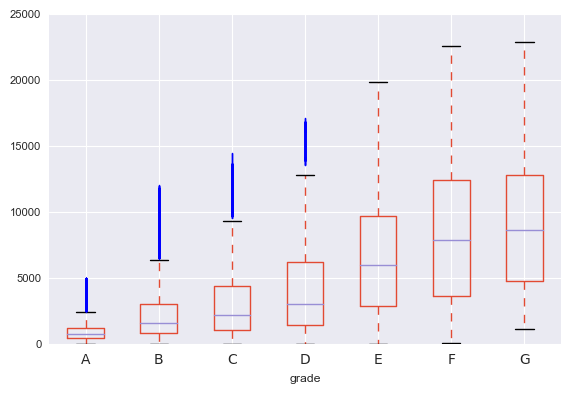

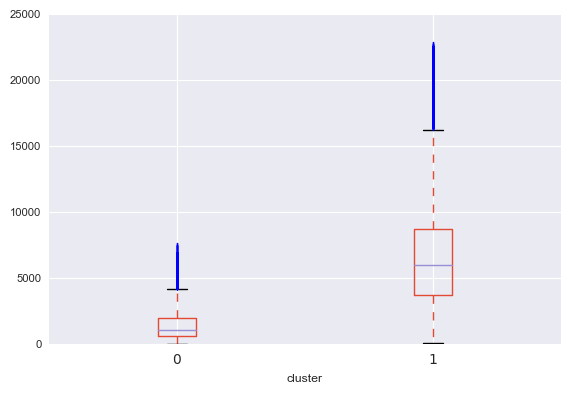

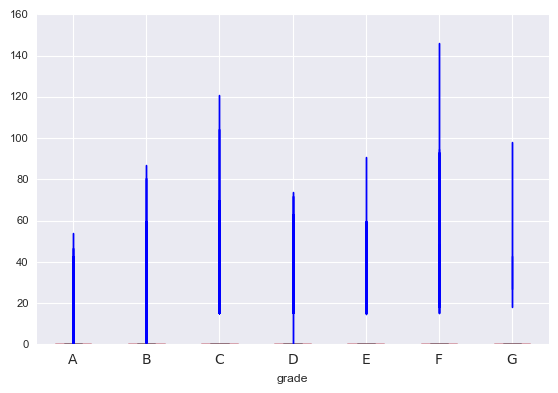

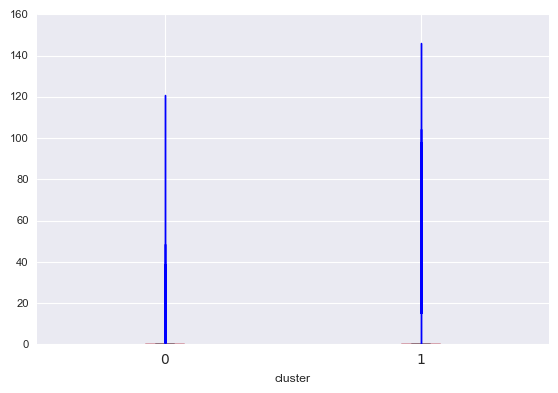

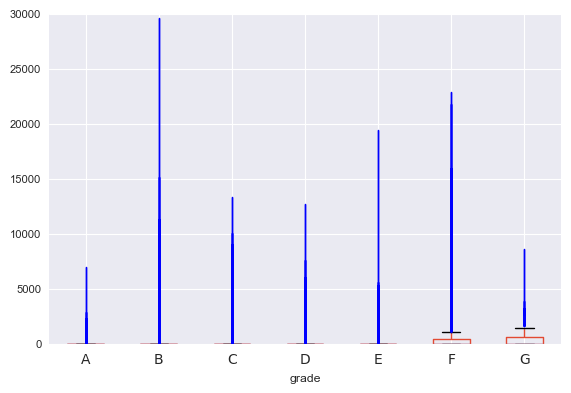

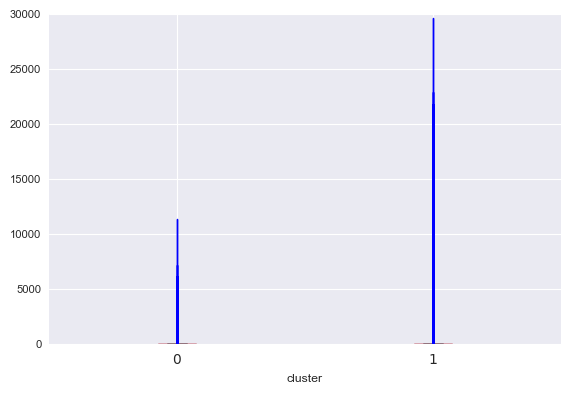

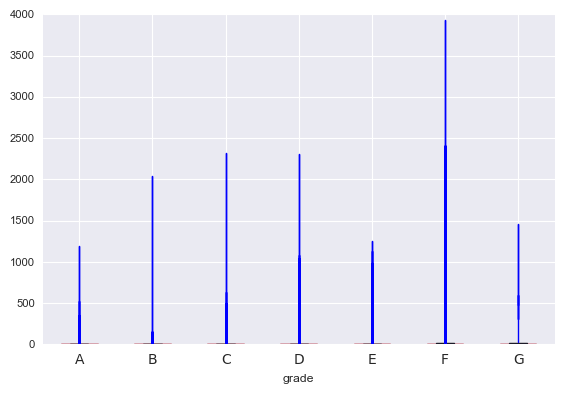

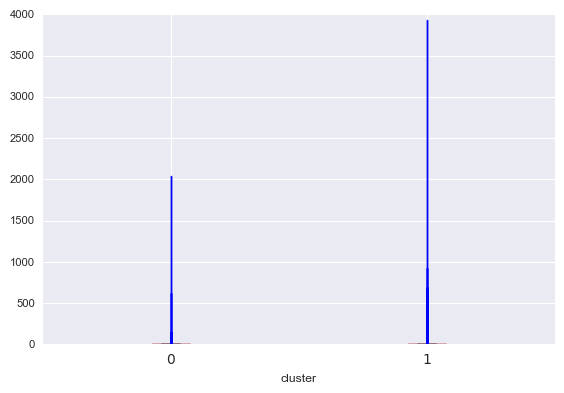

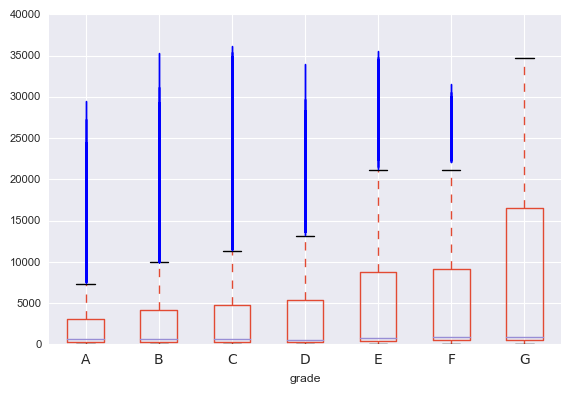

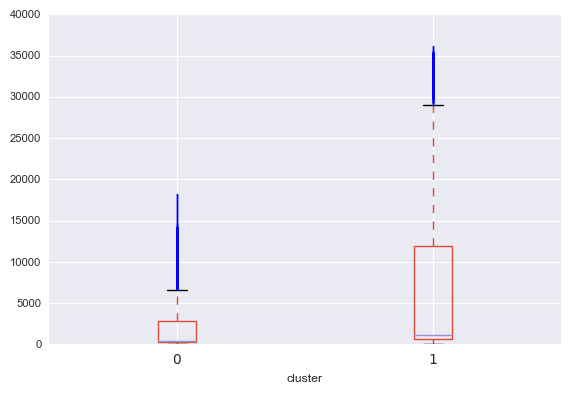

In [45]:
df = pd.read_sql_query("""SELECT
id,
grade,
funded_amnt ,
funded_amnt_inv,
loan_amnt ,
cast (replace( term, ' months', '' ) as FLOAT) as term_float,
cast (replace( int_rate, '%', '' ) as FLOAT) as int_rate_float,
installment ,
annual_inc ,
dti ,
delinq_2yrs ,
inq_last_6mths ,
open_acc ,
pub_rec ,
revol_bal ,
total_acc ,
out_prncp ,
out_prncp_inv,
total_pymnt ,
total_pymnt_inv,
total_rec_prncp ,
total_rec_int ,
total_rec_late_fee ,
recoveries ,
collection_recovery_fee ,
last_pymnt_amnt from loan WHERE
funded_amnt IS NOT NULL AND
loan_amnt IS NOT NULL AND
term_float IS NOT NULL AND
int_rate_float IS NOT NULL AND
installment IS NOT NULL AND
emp_length IS NOT NULL AND
annual_inc IS NOT NULL AND
dti IS NOT NULL AND
delinq_2yrs IS NOT NULL AND
inq_last_6mths IS NOT NULL AND
open_acc IS NOT NULL AND
pub_rec IS NOT NULL AND
revol_bal IS NOT NULL AND
total_acc IS NOT NULL AND
out_prncp IS NOT NULL AND
total_pymnt IS NOT NULL AND
total_rec_prncp IS NOT NULL AND
total_rec_int IS NOT NULL AND
total_rec_late_fee IS NOT NULL AND
recoveries IS NOT NULL AND
collection_recovery_fee IS NOT NULL AND
last_pymnt_amnt IS NOT NULL limit 8000
""", con)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-paper')


plt.figure()
df["cluster"] = kmeans.labels_
for field in df.columns:
    if field not in ['id', 'cluster', 'grade']:
        df.boxplot(column=field, by='grade')
        plt.title("")
        plt.suptitle("")
        plt.savefig(field+'_by_grade.png', bbox_inches='tight')
        df.boxplot(column=field, by='cluster')
        plt.title("")
        plt.suptitle("")
        plt.savefig(field+'_by_cluster.png', bbox_inches='tight')




In [6]:
matplotlib.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [37]:
plt.figure()
df["cluster"] = kmeans.labels_
for field in df.columns:
    if field not in ['id', 'cluster', 'grade']:
        df.boxplot(column=field, by='grade')
        df.boxplot(column=field, by='cluster')

Index([u'id', u'grade', u'funded_amnt', u'funded_amnt_inv', u'loan_amnt',
       u'term_float', u'int_rate_float', u'installment', u'annual_inc', u'dti',
       u'delinq_2yrs', u'inq_last_6mths', u'open_acc', u'pub_rec',
       u'revol_bal', u'total_acc', u'out_prncp', u'out_prncp_inv',
       u'total_pymnt', u'total_pymnt_inv', u'total_rec_prncp',
       u'total_rec_int', u'total_rec_late_fee', u'recoveries',
       u'collection_recovery_fee', u'last_pymnt_amnt', u'cluster'],
      dtype='object')